# Intro

This notebook accompanies the article at http://crosstab.io/articles/survival-plots. Please see the article for text explanations of each section.

# Lifelines survival curve with Matplotlib

In [1]:
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [2]:
data = load_dd()
data[['ctryname', 'ehead', 'duration', 'observed']].sample(5, random_state=19)

ctryname                ehead  duration  observed
1022                Mauritania  Mustapha Ould Salek         1         1
1565               Switzerland        Ruth Dreifuss         1         1
763                    Ireland      Eamon de Valera         2         1
1722  United States of America         Bill Clinton         8         1
1416                   Somalia    Abdirizak Hussain         3         1

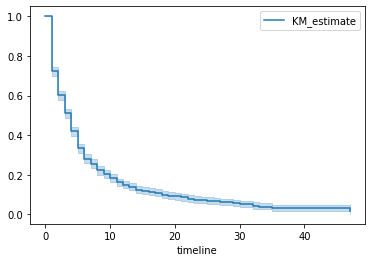

In [3]:
kmf = KaplanMeierFitter()
kmf.fit(durations=data['duration'], event_observed=data['observed'])

kmf.plot_survival_function()
plt.savefig("matplotlib_survival.png", dpi=500, bbox_inches='tight')

# Plotly survival curve, with confidence band

In [4]:
import plotly.graph_objs as go

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=kmf.survival_function_.index, y=kmf.survival_function_['KM_estimate'],
    line=dict(shape='hv', width=3, color='rgb(31, 119, 180)'),
))

In [6]:
fig.add_trace(go.Scatter(
    x=kmf.confidence_interval_.index, y=kmf.confidence_interval_['KM_estimate_upper_0.95'],
    line=dict(shape='hv', width=0),
))

fig.add_trace(go.Scatter(
    x=kmf.confidence_interval_.index, y=kmf.confidence_interval_['KM_estimate_lower_0.95'],
    line=dict(shape='hv', width=0),
    fill='tonexty',
    fillcolor='rgba(31, 119, 180, 0.3)',
))

# Most of this styling is for the published version of the plot. It doesn't look nice in the notebook.
fig.update_layout(
    xaxis_title="Duration",
    yaxis_title="Survival probability",
    # margin=go.layout.Margin(l=70, r=10, t=10, b=60),
    # font_size=32,
    showlegend=False,
    template="simple_white",
    # xaxis_title_font_size=42,
    # yaxis_title_font_size=42
)

fig.show()
# fig.write_image("plotly_survival.png", height=1400, width=1400)


# Altair survival curve, with confidence band

In [7]:
import altair as alt

In [8]:
df_plot = kmf.survival_function_.copy(deep=True)
df_plot['lower_bound'] = kmf.confidence_interval_['KM_estimate_lower_0.95']
df_plot['upper_bound'] = kmf.confidence_interval_['KM_estimate_upper_0.95']
df_plot.reset_index(inplace=True)
df_plot.head()

timeline  KM_estimate  lower_bound  upper_bound
0       0.0     1.000000     1.000000     1.000000
1       1.0     0.721792     0.700522     0.741841
2       2.0     0.601973     0.578805     0.624308
3       3.0     0.510929     0.487205     0.534126
4       4.0     0.418835     0.395233     0.442242

In [9]:
line = (
    alt.Chart(df_plot)
    .mark_line(interpolate='step-after')
    .encode(
        x=alt.X("timeline", axis=alt.Axis(title="Duration")),
        y=alt.Y("KM_estimate", axis=alt.Axis(title="Survival probability"))
    )
)

band = line.mark_area(opacity=0.4, interpolate='step-after').encode(
    x='timeline',
    y='lower_bound',
    y2='upper_bound'
)

fig = line + band
# fig.save("altair_survival.svg")
fig

alt.LayerChart(...)